# Facial Landmark Detection

In this notebook, we are using opencv and dlib library to detect the facial features and matplotlib library to display the images.OpenCV-Python is a library that helps us to solve the computer vision problems whereas Dlib library has pretrained models for face recognition.

Face has various salient regions such as eyes, nose, ears, lips and many more. The dlib library is used to  map the facial points on a person’s face like image below. There are in total 68 coordinates used to represent the features.
1. Jaw Points = 0–16
2. Right Brow Points = 17–21
3. Left Brow Points = 22–26
4. Nose Points = 27–35
5. Right Eye Points = 36–41
6. Left Eye Points = 42–47
7. Mouth Points = 48–60
8. Lips Points = 61–67

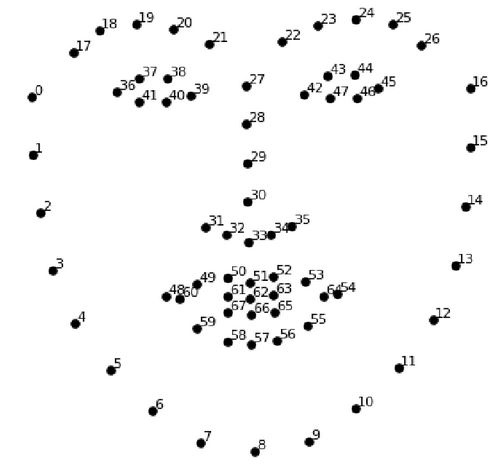

The reason for choosing such libraries like dlib is that it reduces the work of creating the model and gives us pretrained model which is handy and accurate as well. 

In [1]:
#importing necessary libraries
import dlib
import cv2
from matplotlib import pyplot as plt

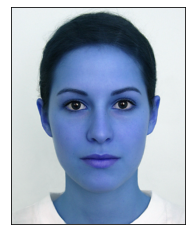

In [2]:
#Display the image
img = cv2.imread('face.jpg') #opencv provides imread function to read the image
plt.imshow(img)# imshow command helps to display the the image
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show() #show the image in the notebook

If we use the above block of code we will face the problem in color of the image. This is because color image loaded by OpenCV is in BGR mode but matplotlib displays in RGB mode. So color images will not be displayed correctly in Matplotlib if image is read with OpenCV. 

#### To fix this problem, we will convert the BGR image to RGB image using cvtColor command as shown below.

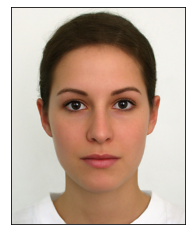

In [3]:
#read the image
img = cv2.imread('face.jpg') #opencv provides imread function to read the image
img2 = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) # convert BGR image to RGB image
plt.imshow(img2) #display image
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()  #show the image in the notebook

Successfully localize the object with rectangle bounding box.


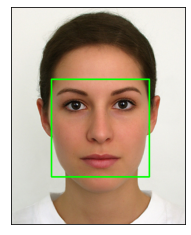

In [4]:
# Load the detector
detector = dlib.get_frontal_face_detector() # get_frontal_face_detector() function is used to detect the face object

# Use detector to find landmarks
faces = detector(img2) # here we are using RGB image converted in previous block

# To localize the face object, four points are stored to draw the bounding box
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point
    # Draw a rectangle
    cv2.rectangle(img=img2, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=2)

print("Successfully localize the object with rectangle bounding box.")
plt.imshow(img2) #Display the image
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show() #show image in notebook

## Landmark Detection
For detecting certain points of the face, we are using <b>shape predictor</b> function which takes an image of a human face as input and identify the locations of important facial landmarks such as the corners of the mouth and eyes, tip of the nose, and many more.

Now, we are using pretrained model which detect 68 points on the face as mentioned in the image at the beginning of the notebook. The pretrained model is already specified in the folder and it can be downloaded from below link: 

https://github.com/italojs/facial-landmarks-recognition/blob/master/shape_predictor_68_face_landmarks.dat

### Detecting One Point

Successfully detect the point on nose


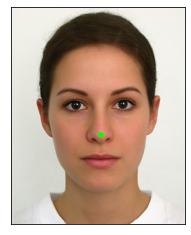

In [5]:
# Load the detector
detector = dlib.get_frontal_face_detector() # get_frontal_face_detector() function is used to detect the face object

# Load the predictor with pretrained model
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") 

img = cv2.imread('face.jpg') # read the image

# Use detector to find landmarks
faces = detector(img2)

#Localize the image
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Look for the landmarks
    landmarks = predictor(image=img, box=face)
    # Here we are using point number 30 to detect the point on the nose
    x = landmarks.part(30).x
    y = landmarks.part(30).y

    # Draw a circle
    cv2.circle(img=img, center=(x, y), radius=5, color=(0, 255, 0), thickness=-1)

print("Successfully detect the point on nose")
img2 = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) #Converting into RGB image
plt.imshow(img2) #display image
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show() #show image in notebook

### Detecting all the points on face
We just need to insert one for loop to get all the 68 points on the face and our objective of detecting landmark points is achieved.

Successfully detected all the landmark points (i.e. 68 points) on the face


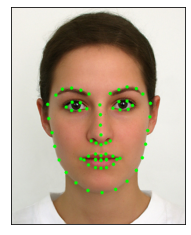

In [6]:
# Load the detector
detector = dlib.get_frontal_face_detector() # get_frontal_face_detector() function is used to detect the face object

# Load the predictor with pretrained model
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# read the image
img = cv2.imread("face.jpg")

# Use detector to find landmarks
faces = detector(img)
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Create landmark object
    landmarks = predictor(image=img, box=face)

    # Loop through all the points to get all the 68 co-ordinates
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        # Draw a circle
        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

print("Successfully detected all the landmark points (i.e. 68 points) on the face")
img2 = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) #converting into RGB image
plt.imshow(img2) #display image
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show() #show image in the notebook

# Conclusion
With the help of pretrained model and existing libraries for computer vision, the objective of landmark detection is achieved with understanding of various functions from the documentation. To solve the problems like this, I think pretrained model is useful and less time consuming as well as we don't have to worry about selecting hyper-parameters.

The one drawback of this method is that we are not aware of how pretrained model is developed from scratch but I assume it should be straight forward like other convolution neural network algorithms.

# References
1. https://livecodestream.dev/post/detecting-face-features-with-python/
2. http://dlib.net/python/index.html#dlib.shape_predictor
3. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html